# Работа 1.2.5 Исследование вынужденной регулярной прецессии гироскопа
---
---

### Цель работы 



- исследовать вынужденную прецессию гироскопа
- установить зависимость скорости вынужденной прецессии от величины момента сил, действующих на ось гироскопа
- определить скорость вращения ротора гироскопа и сравнить ее со скоростью, рассчитанной по скорости прецессии

### Оборудование


- гироскоп
- секундомер
- набор грузов 
- отдельный ротор гироскопа
- цилиндр известной массы
- крутильный маятник
- штангенциркуль
- линейка

## Теория
---

$$ \frac{d \vec{L}}{dt} = \vec{M} = \Omega \times \vec{L}$$

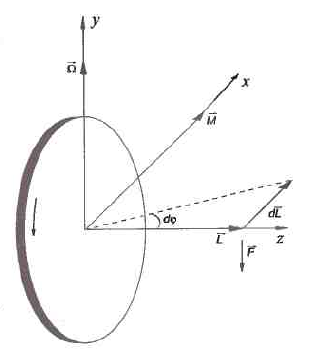

Под действием момента М внешних сил ось гироскопа медленно вращается вокруг оси у с угловой скоростью $ \Omega $.  


Такое движение называется регулярной прецессией гироскопа.    

В частности, создающей момент внешней силой может оказаться сила тяжести, если центр масс
гироскопа, не совпадает с точкой подвеса. Для гироскопа массой $m$,
у которого ось собственного вращения наклонена на угол $\alpha$ от вертикали, скорость прецессии, происходящей вокруг вертикальной оси под
действием силы тяжести, равна

$$ \Omega = \frac{m_{г}gl_{ц}}{I_{z}\omega_{0}} $$

Если подвесить к оси гироскопа дополнительные грузы, это сместит общий центр масс и создаст момент сил тяжести, вызывающий прецессию.

Скорость прецессии 
$$ \Omega = \frac{mgl}{I_{z}\omega_{0}} $$

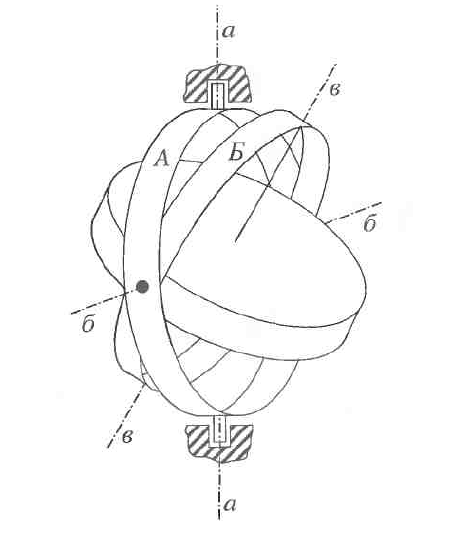 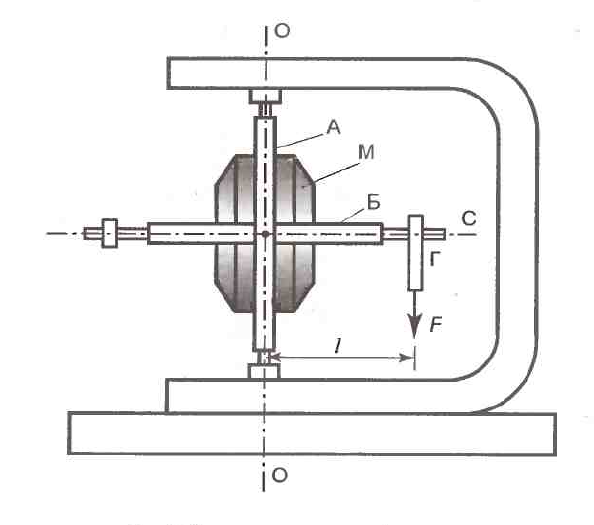

Центр масс в нашей установке при любом повороте сохраняет свое положение в пространстве

### Определение момента инерции ротора

Момент инерции ротора относительно оси симметрии $I_{0}$ измеряется по крутильным колебаниям точной копии ротора, подвешиваемой
вдоль оси симметрии на жесткой проволоке. 

Период крутильных колебаний $T_{0}$ зависит от момента инерции $I_{0}$ и модуля кручения проволоки $f$:


$$ T_{0} = 2\pi\sqrt{\frac{I_{0}}{f}}$$

Что делать с модулем кручения проволоки? Его можно исключить:


Подвесим вместо ротора гироскопа к той же проволоке **цилиндр** правильной формы, момент инерции которого $I_{ц}$ мы можем легко посчитать, и получим пропорцию:

$$ I_{0} = I_{ц} \frac{T_{0}^{2}}{T_{ц}^{2}} $$

### Скорость вращения ротора

Скорость вращения ротора гироскопа можно определить и не при
бегая к исследованию прецессии. 

Ротор электромотора немного намагничен. Вращаясь, он наводит во
второй обмотке переменную ЭДС индукции,
частота которой равна частоте врашения ротора. 


Частоту этой ЭДС
можно измерить по фигурам Лиссажу, получаемым на экране осциллографа

## Ход работы
---

In [533]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [534]:
m_1 = 0.0567 # кг
m_2 = 0.0768 # кг
m_3 = 0.0911 # кг
m_4 = 0.1152 # кг
m_5 = 0.1419 # кг
m_6 = 0.1739 # кг
m_7 = 0.3285 # кг

m = [0.0567, 0.0768, 0.0911, 0.1152, 0.1419, 0.1739, 0.3285]

sigma_m = 0.0001 # кг


Плечо силы mg 

In [535]:
l = 0.12 # м

sigma_l = 0.001 # м


Момент силы $M$

In [536]:
M = [m * 9.81 * l for m in m]


$$ \sigma_{M} = \sqrt{(\sigma_{m} l)^2 + (\sigma_{l} m)^2} $$

In [537]:
sigmas_M = [math.sqrt((sigma_m * l) ** 2) +
                      (sigma_l * m) ** 2 for m in m]

sigmas_M


[1.200321489e-05,
 1.200589824e-05,
 1.200829921e-05,
 1.201327104e-05,
 1.202013561e-05,
 1.203024121e-05,
 1.210791225e-05]

Видно, что $\sigma_{M}$ меньше $M$ на несколько порядков, ими можно пренебречь 

In [538]:
T_1 = 179   # c
T_2 = 134   # c
T_3 = 112   # c
T_4 = 89.5  # c
T_5 = 72.5  # c
T_6 = 59    # c
T_7 = 31.3  # c

T = [179, 134, 112, 89.5, 72.5, 59 , 31.3]


Погрешность времени

In [539]:
sigma_T = 0.4 # с


$$ \Omega = \frac{2\pi}{T} $$

In [540]:
omega_prec = [2 * math.pi / T for T in T]


$$ \sigma_{\Omega} = \frac{2 \pi \sigma_{T}}{T^2} $$

In [541]:
sigmas_omega_prec = [2 * math.pi * sigma_T / T ** 2 for T in T]


In [542]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)


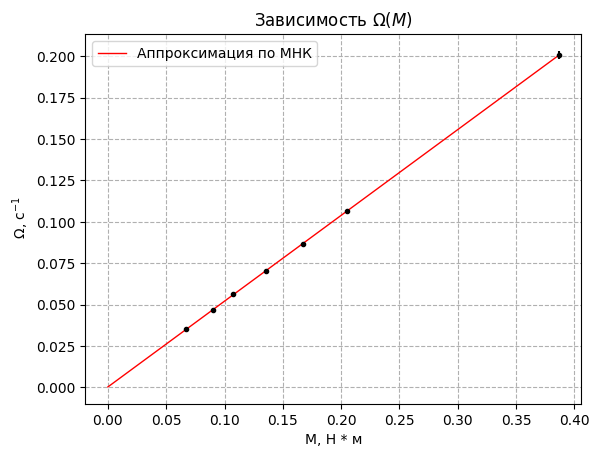

In [543]:
plt.figure()
plt.ylabel(" $\Omega$, c$^{-1}$")
plt.xlabel("M, Н * м")
plt.title('Зависимость $\Omega$($M$)')
plt.grid(True, linestyle = '--')
plt.errorbar( M, omega_prec, xerr= sigmas_M, yerr= sigmas_omega_prec , fmt = '.k')

x = np.array([0, max(M)])

k, b, k_err, b_err = LeastSquares(M, omega_prec)
plt.plot(x, k*x + b , color = 'r', linewidth = 1, label = "Аппроксимация по МНК")
plt.legend()


$$ \Omega = \frac{mgl}{I_{z}\omega_{0}} = \frac{M}{I_{z}\omega_{0}} $$

Откуда коэфф наклона 
$$k = \frac{1}{I_{z}\omega_{0}} = \frac{1}{L_{маховика}} $$

$$ L_{маховика} = \frac{1}{k} $$

$$ \sigma_{L} = \frac{\sigma_{k}}{k^{2}} $$

In [544]:
L = 1 / k
sigma_L = 1 * k_err / k ** 2
L, sigma_L


(1.9291737862360507, 0.0037029897238469766)

Позже в работе мы вычислим $ I_{z} = I_{0} $ маховика, а значит сможем посчитать
$$ \omega_{0} = \frac{L_{маховика}}{I_{0}} $$

### Определение $I_{0}$ маховика

$$ I_{0} = I_{ц} \frac{T_{0}^{2}}{T_{ц}^{2}} $$

Момент инерции цилиндра 
$$ I_{ц} = \frac{m_{ц} r^2}{2} $$

$$ \sigma_{I_{ц}} = m_{ц} \sigma_{r}r $$

In [545]:
sigma_r = 0.0005 # м


In [546]:
d_cyl = 0.078 # м

r_cyl = d_cyl / 2

m_cyl = 1.6167 # кг


In [547]:
I_cyl = m_cyl * r_cyl**2 / 2
sigma_I_cyl = m_cyl * sigma_r * r_cyl


In [548]:
T_cyl = 4.01  # с
T_0   = 3.185 # с


In [549]:
I_0 = I_cyl * T_0**2 / T_cyl**2
I_0


0.0007756374766312866

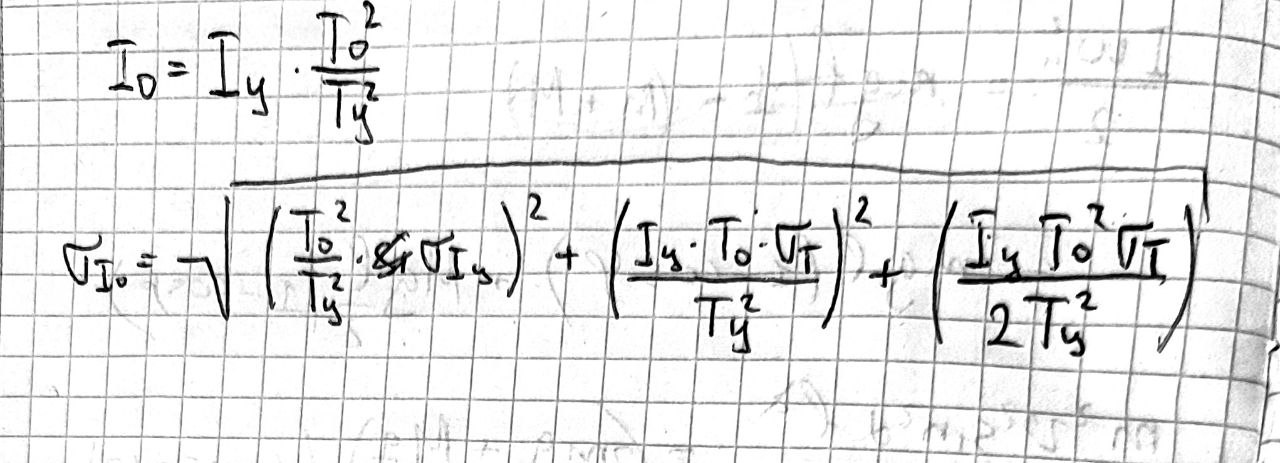

In [550]:
sigma_I_0 = math.sqrt((T_0**2 / T_cyl**2 * sigma_I_cyl)**2 +
                      (I_cyl * 2 * T_0 * sigma_T / T_cyl**2)**2 +
                      (I_cyl * T_0**2 * sigma_T/(2 * T_cyl**3))**2)

sigma_I_0


0.00019961945124115477

In [551]:
I_0, sigma_I_0, sigma_I_0 / I_0


(0.0007756374766312866, 0.00019961945124115477, 0.2573617924034987)

### Рассчет частоты вращения ротора гироскопа

$$ \omega_{0} = \frac{L_{маховика}}{I_{0}} $$

In [552]:
omega_rotor = L / I_0


$$ \sigma_{\omega_{0}} = \sqrt{(\frac{\sigma_{L_{маховика}}}{I_{0}})^2 + (\frac{L_{маховика} \sigma_{I_{0}}}{I_{0}^{2}})^2} $$

In [553]:
sigma_omega_rotor = math.sqrt(
    (sigma_L / I_0) ** 2 +
    (L * sigma_I_0 / I_0**2) ** 2
)


In [554]:
omega_rotor, sigma_omega_rotor, sigma_omega_rotor / omega_rotor


(2487.21064203183, 640.1307919830314, 0.2573689502470532)

$$ \omega_{0} = 2487.2 ~\pm 342.1 ~c^{-1} ~(\epsilon ~\approx ~13.8 \%)$$

Ну и собственно частота вращения ротора 
$$ \nu = \frac{\omega_{0}}{2\pi}$$

In [555]:
nu_rotor = omega_rotor / 2 / math.pi
nu_rotor


395.8518681901324

$$ \sigma_{nu} = \sigma_{\omega_{0}} / 2\pi $$

In [556]:
sigma_nu_rotor = sigma_omega_rotor / 2 / math.pi


In [557]:
nu_rotor, sigma_nu_rotor, sigma_nu_rotor / nu_rotor


(395.8518681901324, 101.87997976942926, 0.25736895024705325)

$$ \nu = 395.9 ~\pm 54.5 ~Гц ~(\epsilon ~\approx ~13.8 \%)$$

Эти данные замечательно соотносятся со значением, полученным по осциллографу.


Когда мы подключили гироскоп к осциллографу, фигуру лиссажу невозможно было наблюдать изза ЭДС, наводимого в обмотках.   
Поэтому мы несколько раз выключали питание гироскопа и искали момент при котором фигура лиссажу на экране приобретала вид неподвижного эллипса.


Таким способом получили.
$$ \nu = 389 ~Гц$$ 

### Определение момента сил трения

In [558]:
sigma_angle = 5  # градусов, т к на глаз определял

delta_phi   = 20 # градусов

T_friction = [179, 134, 112, 179, 145, 118, 94]
omegas_friction = [delta_phi / T for T in T_friction]
omegas_friction


[0.11173184357541899,
 0.14925373134328357,
 0.17857142857142858,
 0.11173184357541899,
 0.13793103448275862,
 0.1694915254237288,
 0.2127659574468085]

In [559]:
sigmas_omega_friction = [math.sqrt((sigma_angle / T) ** 2 +
                                 (delta_phi * sigma_T / T**2) ** 2) for T in T]

sigmas_omega_friction


[0.027934076760269773,
 0.03731609264267176,
 0.044647412304048825,
 0.05587484818419536,
 0.06898230965350458,
 0.0847769188853734,
 0.15995298455853196]

$$ M_{тр} = \Omega_{тр} \times L $$

In [560]:
M_frictions = [omega_friction * L for omega_friction in omegas_friction]
M_frictions


[0.2155501437135252,
 0.2879363860053807,
 0.34449531897072333,
 0.2155501437135252,
 0.26609293603255874,
 0.32697860783661875,
 0.41046250770979803]

In [561]:
sigma_M_friction = np.std(M_frictions) / math.sqrt(len(M_frictions))

sigma_M_friction


0.02487252035532535

In [562]:
np.mean(M_frictions), sigma_M_friction, sigma_M_friction / np.mean(M_frictions)


(0.2952951491403043, 0.02487252035532535, 0.08422935638372986)

$$ M_{тр} = 295.3 ~\pm 24.9 ~мН  ~м  ~(\epsilon ~\approx 8.4 \%)$$

## Вывод

Мы измерили угловую скорость и частоту вращения ротора:
$$ \omega_{0} = 2487.2 ~\pm 342.1 ~c^{-1} ~(\epsilon ~\approx ~13.8 \%)$$
$$ \nu = 395.9 ~\pm 54.5 ~Гц ~(\epsilon ~\approx ~13.8 \%)$$

Еще мы намерили момент сил трения, но мне эта часть не понравилась, т к огромные погрешности, транспортир нормально не приложить и еще боишься, что ничего не успеешь 
$$ M_{тр} = 295.3 ~\pm 24.9 ~мН  ~м  ~(\epsilon ~\approx 8.4 \%)$$

При включении установки и начале измерений, меня стали посещать навязчивые мысли о вращающихся предметах: рыбах, чипсах, тараканах - тех самых предметах, которые часами крутятся на ютубе под забавную музыку и собирают миллионы просмотров. 

В какой то момент я не сдержался и включил на ноутбуке видео с вращающейся рыбой и задумался о ее моменте инерции. Ну а что еще было делать, пока ждешь проворота гироскопа целых 3 минуты?

Всю лабу я слушал шум установок и при выходе мне стало его не хватать. 